In [48]:
import numpy as np
import pandas as pd
import re
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import joblib
from sklearn.metrics import confusion_matrix
import seaborn as sns 
import matplotlib.pyplot as plt


In [2]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\LENOVO\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [5]:
# printing stopword in english
# print(stopwords.words('english'))

Data Pre-processing


loading a dataset using pandas dataframe

In [7]:
dataset=pd.read_csv("C:\\AI-project\\AI\\AI\\fake_news_detector\\news.csv")

In [8]:
dataset.shape

(6335, 4)

<!-- loading the dataset to a pandas Dataframe -->

In [ ]:
# print first five value of dataset
dataset.head()

In [9]:
dataset = dataset.rename(columns={'Unnamed: 0': 'id'})
display(dataset.head())

,id,title,text,label
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL


In [10]:
# counting the number of missing value in dataset
dataset.isnull().sum()

id       0
title    0
text     0
label    0
dtype: int64

In [11]:
dataset = dataset.rename(columns={'Unnamed: 0': 'id'})
display(dataset.head())

,id,title,text,label
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL


In [12]:
# seperating data and label
X=dataset.drop(columns='label',axis=1)
Y=dataset['label']

In [13]:
print(X)


         id                                              title  \
0      8476                       You Can Smell Hillary’s Fear   
1     10294  Watch The Exact Moment Paul Ryan Committed Pol...   
2      3608        Kerry to go to Paris in gesture of sympathy   
3     10142  Bernie supporters on Twitter erupt in anger ag...   
4       875   The Battle of New York: Why This Primary Matters   
...     ...                                                ...   
6330   4490  State Department says it can't find emails fro...   
6331   8062  The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...   
6332   8622  Anti-Trump Protesters Are Tools of the Oligarc...   
6333   4021  In Ethiopia, Obama seeks progress on peace, se...   
6334   4330  Jeb Bush Is Suddenly Attacking Trump. Here's W...   

                                                   text  
0     Daniel Greenfield, a Shillman Journalism Fello...  
1     Google Pinterest Digg Linkedin Reddit Stumbleu...  
2     U.S. Secretary of State Joh

In [14]:
print(Y)

0       FAKE
1       FAKE
2       REAL
3       FAKE
4       REAL
        ... 
6330    REAL
6331    FAKE
6332    FAKE
6333    REAL
6334    REAL
Name: label, Length: 6335, dtype: object


In [15]:
dataset['content']=dataset['title']

**stemming procedure**

stemming is the process of reducing a word to it's root word


In [16]:
port_stem=PorterStemmer()

In [17]:
def stemming(content):
  stemmed_content=re.sub('[^a-zA-Z]',' ',content)
  stemmed_content=stemmed_content.lower()
  stemmed_content=stemmed_content.split()
  stemmed_content=[port_stem.stem(word) for word in stemmed_content if not word in stopwords.words('english')]
  stemmed_content=' '.join(stemmed_content)
  return stemmed_content

In [18]:
dataset['content']=dataset['title']
dataset['content']=dataset['content'].apply(stemming)

In [19]:
print(dataset['content'])

0                                      smell hillari fear
1       watch exact moment paul ryan commit polit suic...
2                           kerri go pari gestur sympathi
3          berni support twitter erupt anger dnc tri warn
4                           battl new york primari matter
                              ...                        
6330       state depart say find email clinton specialist
6331                        p pb stand plutocrat pentagon
6332             anti trump protest tool oligarchi inform
6333    ethiopia obama seek progress peac secur east a...
6334                jeb bush suddenli attack trump matter
Name: content, Length: 6335, dtype: object


In [20]:
# seperating the data and label
X=dataset['content'].values
Y=dataset['label'].values



In [21]:
print(X)

['smell hillari fear'
 'watch exact moment paul ryan commit polit suicid trump ralli video'
 'kerri go pari gestur sympathi' ...
 'anti trump protest tool oligarchi inform'
 'ethiopia obama seek progress peac secur east africa'
 'jeb bush suddenli attack trump matter']


In [22]:
print(Y)

['FAKE' 'FAKE' 'REAL' ... 'FAKE' 'REAL' 'REAL']


creating texual data into numerical data

In [23]:
vectorizer=TfidfVectorizer()
vectorizer.fit(X)

X=vectorizer.transform(X)

In [24]:
print(X)

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 45882 stored elements and shape (6335, 6884)>
  Coords	Values
  (0, 2230)	0.5606827254461214
  (0, 2817)	0.31703295849951846
  (0, 5631)	0.7649346276717717
  (1, 1212)	0.3538286538491304
  (1, 2101)	0.44595444447238664
  (1, 3939)	0.3279355637571237
  (1, 4462)	0.26757273402295384
  (1, 4630)	0.24403179029804972
  (1, 4905)	0.29382045650093463
  (1, 5263)	0.29163264316148546
  (1, 5933)	0.3501812302002013
  (1, 6315)	0.13561903129801023
  (1, 6571)	0.21736822482437437
  (1, 6671)	0.27855534550881683
  (2, 2536)	0.5345737509664292
  (2, 2576)	0.3357697230253524
  (2, 3335)	0.41740393299177314
  (2, 4428)	0.37615749278439464
  (2, 6015)	0.5345737509664292
  (3, 215)	0.41916879208304547
  (3, 561)	0.2969312816565521
  (3, 1764)	0.3507454498930073
  (3, 2048)	0.4448394256850793
  (3, 5956)	0.27803614912134916
  (3, 6288)	0.3148734995784654
  :	:
  (6330, 5809)	0.3024865273895357
  (6331, 4474)	0.5790025183139886
  (6331, 4493)	0

spliting the dataset for training and testing

In [74]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,stratify=Y,random_state=2)

Training Model : logistic regression model


In [75]:
model=LogisticRegression()

In [76]:
model.fit(X_train,Y_train)

LogisticRegression()

Evaluation

Accuracy score


In [77]:
# accuracy score on the training data
X_train_prediction=model.predict(X_train)
training_data_accuracy=accuracy_score(X_train_prediction,Y_train)

In [78]:
print("Accuracy score of the training data : ",training_data_accuracy)

Accuracy score of the training data :  0.9078531965272296


In [79]:
#  accuracy score of the testing data
X_test_prediction=model.predict(X_test)
testing_data_accuracy=accuracy_score(X_test_prediction,Y_test)

In [80]:
print("Accuracy score of the testing data : ",testing_data_accuracy)

Accuracy score of the testing data :  0.8334648776637726


**Making a prediction system**

In [81]:
X_new=X_test[33]

prediction=model.predict(X_new)
print(prediction)

if (prediction[0]==0):
  print('The news is Real')
else:
  print('The news is Fake')

['FAKE']
The news is Fake


In [82]:
print(Y_test[33])

REAL


In [83]:
Y_pred = model.predict(X_test)

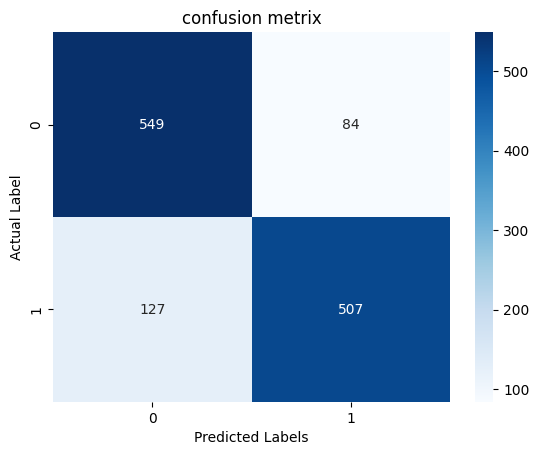

In [84]:
# prediction confusion metrics which is tell us how well our model prediction match with actual pridiction 

cm=confusion_matrix(Y_test,Y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted Labels")
plt.ylabel("Actual Label")
plt.title("confusion metrix")
plt.show()

In [85]:
cm.shape

(2, 2)

In [58]:
print("sum of all :",cm.sum())
print("total testing sample : ", len(Y_test))

sum of all : 1267
total testing sample :  1267


In [ ]:
# re training model 

In [65]:
model2 = LogisticRegression(C=0.1, penalty='l1', solver='liblinear', max_iter=500)

# Retrain
model2.fit(X_train, Y_train)


LogisticRegression(C=0.1, max_iter=500, penalty='l1', solver='liblinear')

In [70]:
X_train_prediction=model2.predict(X_train)
training_data_accuracy=accuracy_score(X_train_prediction,Y_train)
print("Accuracy score of the training data : ",training_data_accuracy)

Accuracy score of the training data :  0.6497632202052092


In [71]:
X_test_prediction=model2.predict(X_test)
testing_data_accuracy=accuracy_score(X_test_prediction,Y_test)
print("Accuracy score of the testing data : ",testing_data_accuracy)

Accuracy score of the testing data :  0.6479873717442778


In [72]:
Y_pred = model2.predict(X_test)

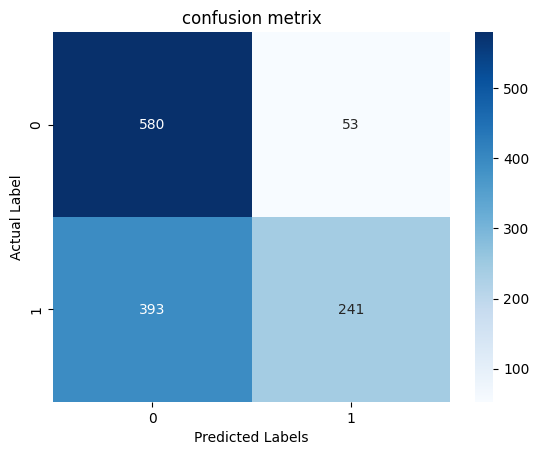

In [73]:
cm=confusion_matrix(Y_test,Y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted Labels")
plt.ylabel("Actual Label")
plt.title("confusion metrix")
plt.show()

In [45]:
#  save model 
joblib.dump(model,"fake_news_pridiction.pkl")

['fake_news_pridiction.pkl']

In [46]:
# load letter
model=joblib.load("fake_news_pridiction.pkl")